Connected to myenv (Python 3.12.8)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Create folder for images
os.makedirs("figures", exist_ok=True)

data_path = "../data/processed/"
live = pd.read_csv(f"{data_path}live20_clean.csv")

In [3]:
# ============================================
# Drive Dataset Correlation Heatmap
# ============================================
# Check all columns
print(live.columns.tolist())

features = live.columns.tolist()
print("Features for correlation heatmap:", features)

print("\n" + "="*50)
print("CORRELATION WITH FEATURES")
print("="*50)
corr = live[features].corr()
print(corr)

['engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load', 'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1', 'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e', 'commanded_throttle_actuator', 'fuel_air_commanded_equiv_ratio', 'absolute_barometric_pressure', 'relative_throttle_position', 'intake_air_temp', 'timing_advance', 'catalyst_temperature_bank1_sensor1', 'catalyst_temperature_bank1_sensor2', 'control_module_voltage', 'commanded_evaporative_purge', 'time_run_with_mil_on', 'time_since_trouble_codes_cleared', 'distance_traveled_with_mil_on', 'warm_ups_since_codes_cleared']
Features for correlation heatmap: ['engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load', 'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1', 'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e', 'commanded_throttle_actuator', 'fuel_air_command

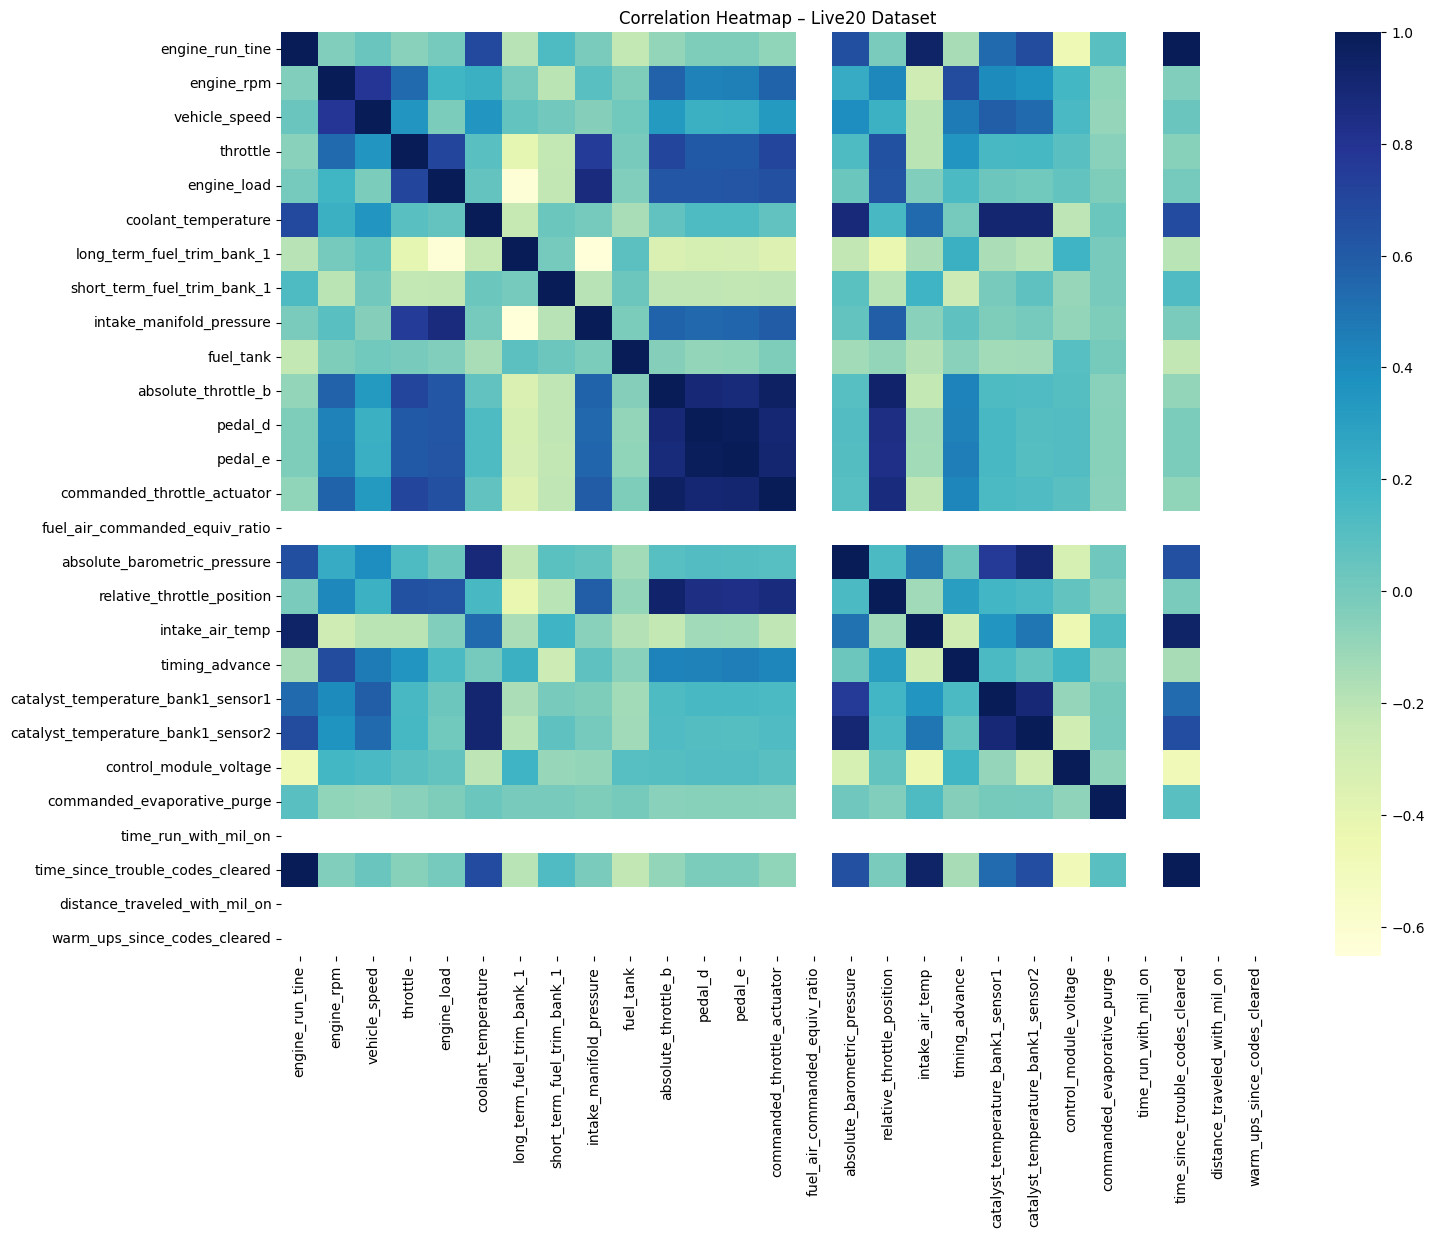

In [4]:
# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(live[features].corr(), cmap='YlGnBu')
plt.title("Correlation Heatmap – Live20 Dataset")
plt.savefig("figures/live20_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
print("\nNaN values per column in correlation matrix:")
print(corr[features].isna().sum())

# Identify columns to drop
columns_to_drop_live = [
    'fuel_air_commanded_equiv_ratio',
    'time_run_with_mil_on',
    'distance_traveled_with_mil_on',
    'warm_ups_since_codes_cleared'
]


NaN values per column in correlation matrix:
engine_run_tine                        4
engine_rpm                             4
vehicle_speed                          4
throttle                               4
engine_load                            4
coolant_temperature                    4
long_term_fuel_trim_bank_1             4
short_term_fuel_trim_bank_1            4
intake_manifold_pressure               4
fuel_tank                              4
absolute_throttle_b                    4
pedal_d                                4
pedal_e                                4
commanded_throttle_actuator            4
fuel_air_commanded_equiv_ratio        27
absolute_barometric_pressure           4
relative_throttle_position             4
intake_air_temp                        4
timing_advance                         4
catalyst_temperature_bank1_sensor1     4
catalyst_temperature_bank1_sensor2     4
control_module_voltage                 4
commanded_evaporative_purge            4
time_run_wi

In [6]:
# Remove them from feature list
features_clean_live = [f for f in features if f not in columns_to_drop_live]

# Recompute correlation
corr_live_clean = live[features_clean_live].corr()

print("\nCleaned correlation matrix for live:")
print(corr_live_clean)


Cleaned correlation matrix for live:
                                    engine_run_tine  engine_rpm  \
engine_run_tine                            1.000000   -0.034994   
engine_rpm                                -0.034994    1.000000   
vehicle_speed                              0.043386    0.786101   
throttle                                  -0.060903    0.536328   
engine_load                                0.001754    0.178302   
coolant_temperature                        0.684524    0.211458   
long_term_fuel_trim_bank_1                -0.192868    0.002958   
short_term_fuel_trim_bank_1                0.129868   -0.205070   
intake_manifold_pressure                  -0.019302    0.094252   
fuel_tank                                 -0.226638   -0.029602   
absolute_throttle_b                       -0.088949    0.573622   
pedal_d                                   -0.027225    0.444554   
pedal_e                                   -0.028064    0.450985   
commanded_throttle_actua

In [7]:
##not necessary the copy but keeping for consistency
corr_matrix_live = corr_live_clean.copy()

# Get upper triangle of the correlation matrix
upper_tri_live = corr_matrix_live.where(
    np.triu(np.ones(corr_matrix_live.shape), k=1).astype(bool)
)

strongest_pos_live = upper_tri_live.stack().sort_values(ascending=False)
print("\n" + "="*50)
print("Strongest positive correlations (LIVE):")
print("="*50)
print(strongest_pos_live.head(10))

strongest_neg_live = upper_tri_live.stack().sort_values(ascending=True)
print("\n" + "="*50)
print("Strongest negative correlations (LIVE):")
print("="*50)
print(strongest_neg_live.head(10))


Strongest positive correlations (LIVE):
engine_run_tine               time_since_trouble_codes_cleared      0.998729
pedal_d                       pedal_e                               0.989431
absolute_throttle_b           commanded_throttle_actuator           0.955526
engine_run_tine               intake_air_temp                       0.944241
intake_air_temp               time_since_trouble_codes_cleared      0.941951
absolute_throttle_b           relative_throttle_position            0.935414
coolant_temperature           catalyst_temperature_bank1_sensor1    0.916711
                              catalyst_temperature_bank1_sensor2    0.913052
pedal_e                       commanded_throttle_actuator           0.911113
absolute_barometric_pressure  catalyst_temperature_bank1_sensor2    0.906670
dtype: float64

Strongest negative correlations (LIVE):
long_term_fuel_trim_bank_1    intake_manifold_pressure           -0.652027
engine_load                   long_term_fuel_trim_bank_1  

In [8]:
# ===========================================
# Scatter plots for strongest correlations
# ===========================================

os.makedirs("figures/live20_scatter/positive", exist_ok=True)
os.makedirs("figures/live20_scatter/negative", exist_ok=True)


Creating scatter plots for top 5 positive correlations...


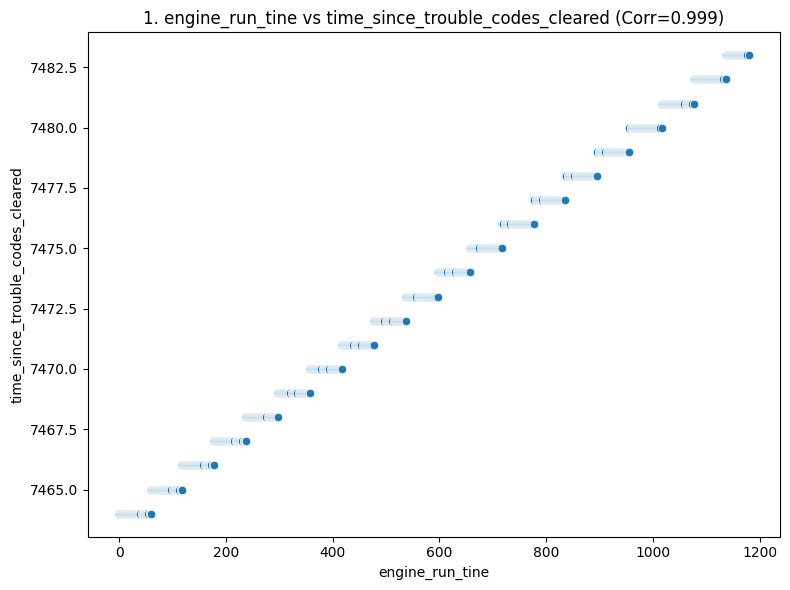

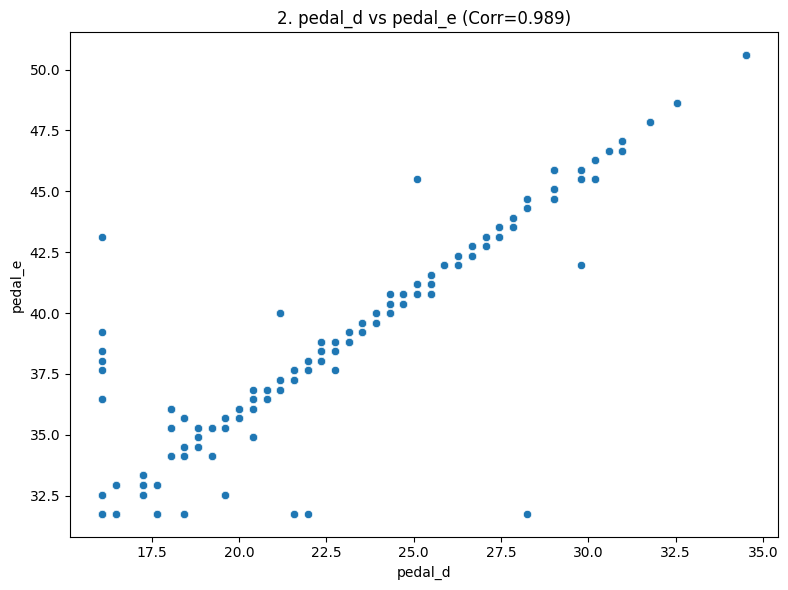

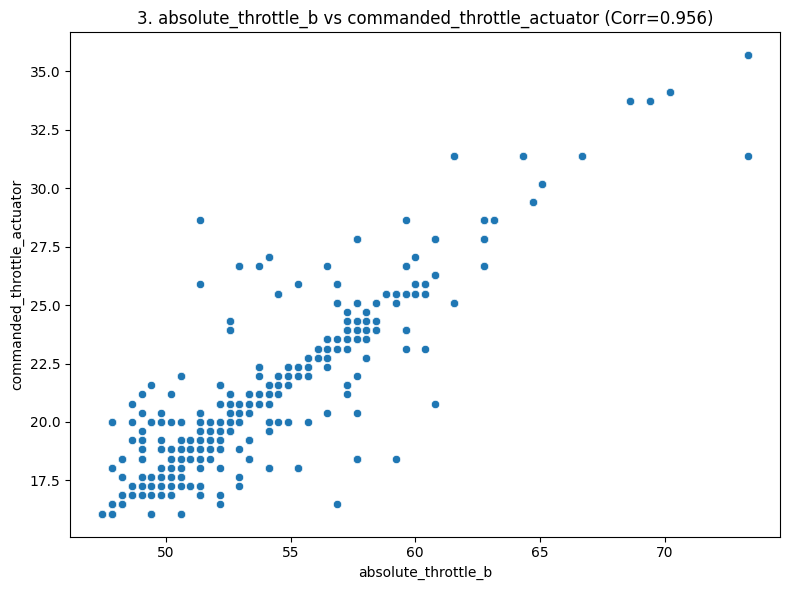

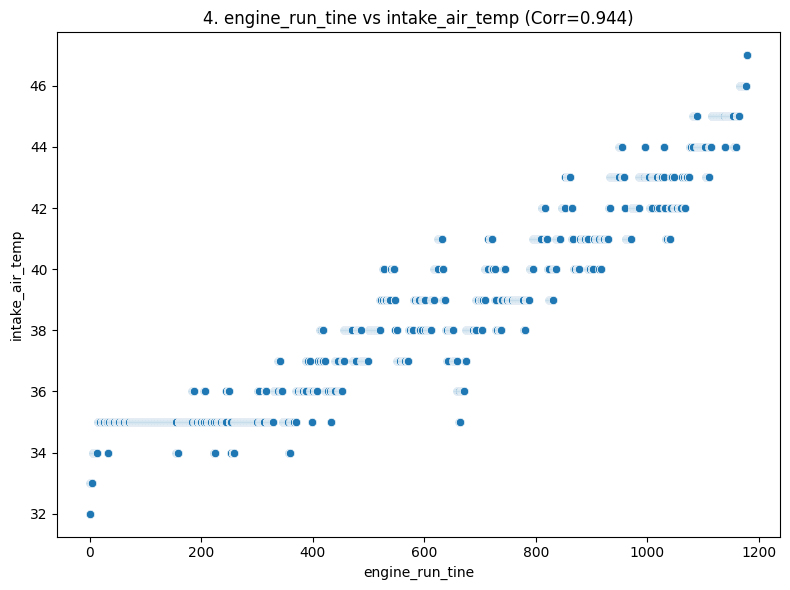

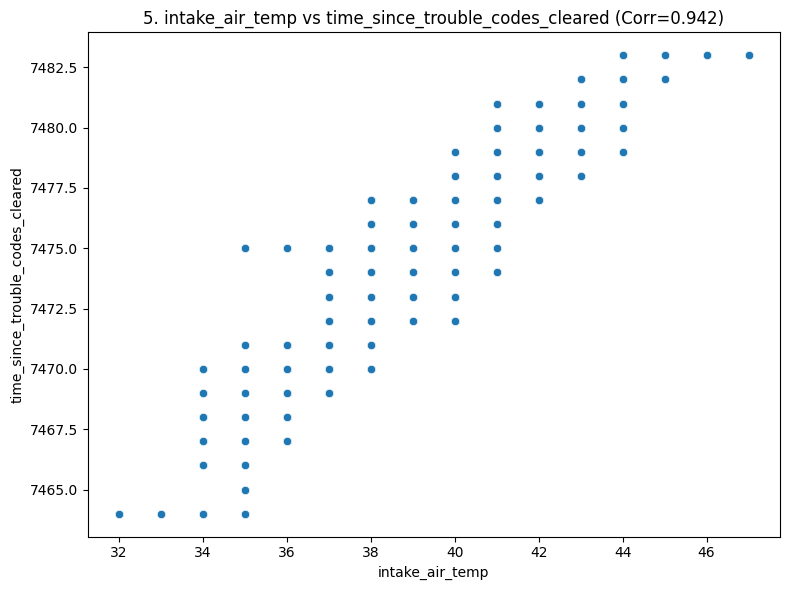

In [9]:
# Top 5 positive correlations
top5_pos = strongest_pos_live.head(5)
print("\nCreating scatter plots for top 5 positive correlations...")
for i, ((col1, col2), value) in enumerate(top5_pos.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=live, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/live20_scatter/positive/scatter_pos{i}_{col1}_{col2}.png", dpi=300)
    plt.show()

Creating scatter plots for top 5 negative correlations...


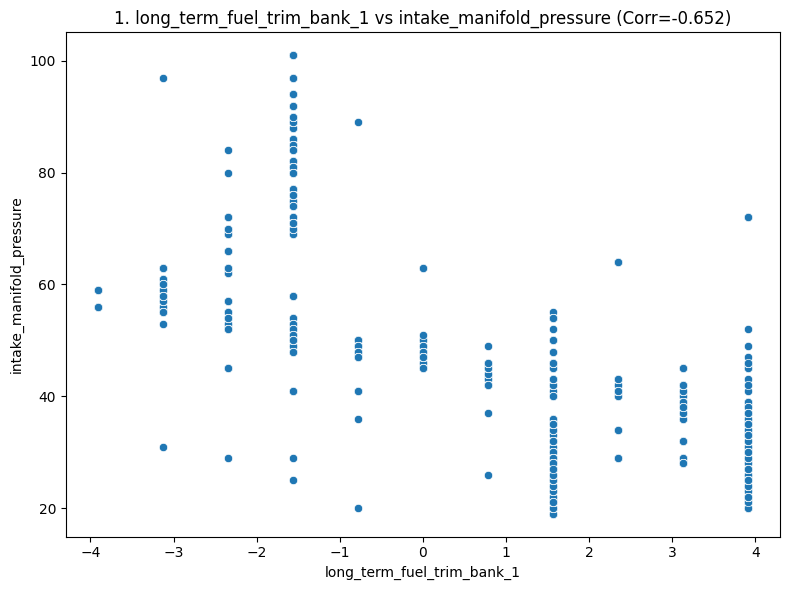

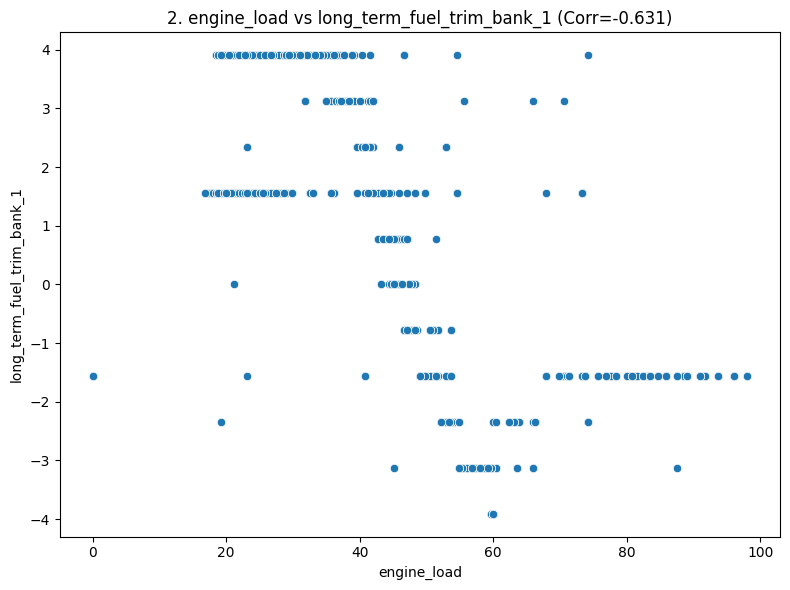

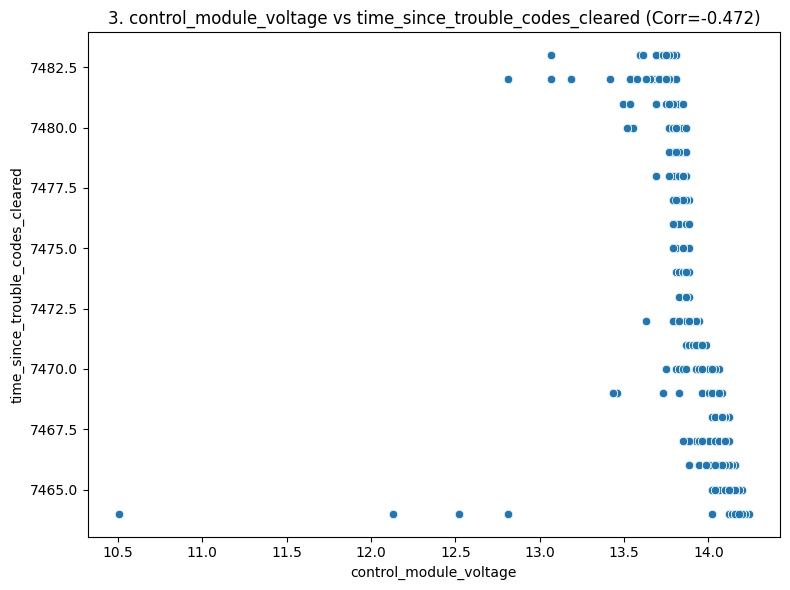

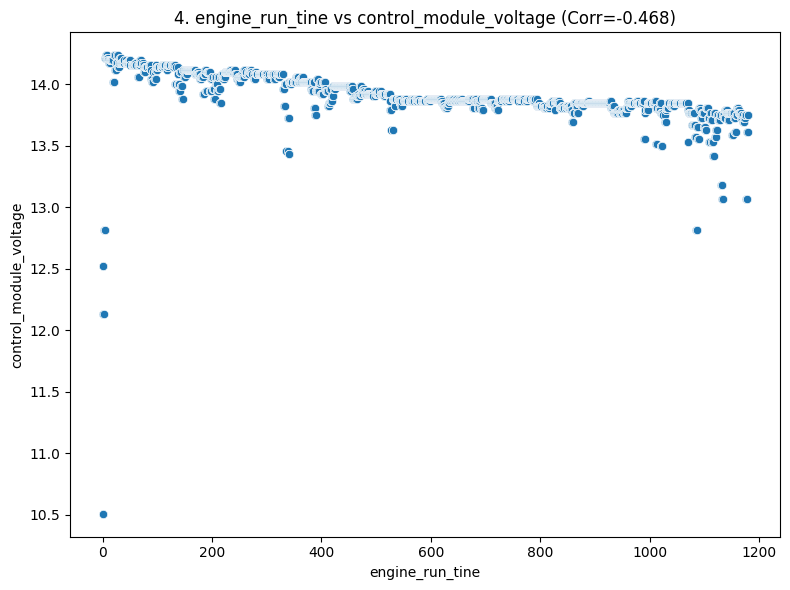

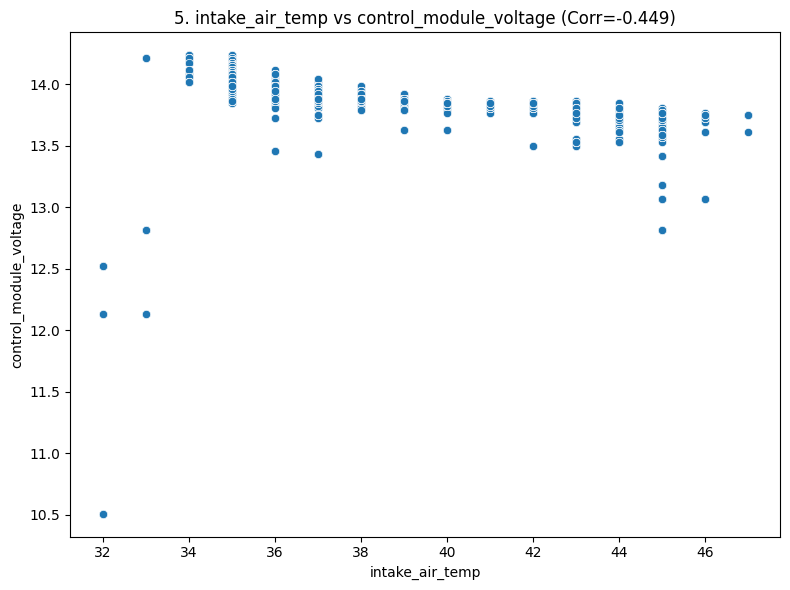

In [10]:
# Top 5 negative correlations
top5_neg = strongest_neg_live.head(5)
print("Creating scatter plots for top 5 negative correlations...")
for i, ((col1, col2), value) in enumerate(top5_neg.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=live, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/live20_scatter/negative/scatter_neg{i}_{col1}_{col2}.png", dpi=300)
    plt.show()